## 1. Basic classification: Classify images of clothing
https://www.tensorflow.org/tutorials/keras/classification

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. 


In [1]:
import sys
!{sys.executable} -m pip install tensorflow

In [2]:
import tensorflow as tf, keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0



Basic classification: Classify images of clothing
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here. This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.
Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow.

In [3]:
# Import the Fashion MNIST data set
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents. Each image is mapped to a single label. Since the class names are not included with the dataset, we store them here to use later when plotting the images.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data. 


In [5]:
# The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels. 
# Likewise , there a re 60.000 labels in the trainig set.
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

# Preprocesing the data

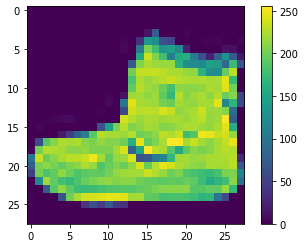

In [8]:
#  If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255.
#  It's important that the training set and the testing set be preprocessed in the same way.
train_images = train_images/255.0
test_images = test_images /255.0

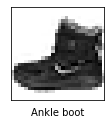

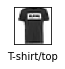

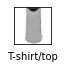

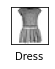

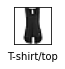

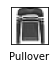

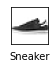

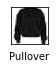

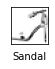

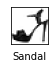

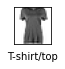

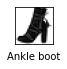

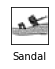

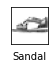

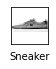

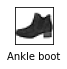

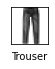

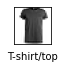

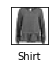

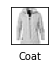

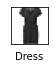

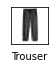

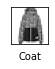

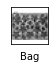

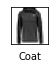

In [10]:
#To verify that the data is in the correct format and that  we're ready to build and train the network, 
# let's display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

# Build the model

In [11]:
# Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

**tf.keras.layers.Flatten** - transform the format of the images from a two_dimensional array to a one_dimensional array, has no parameters to leran

**tf.keras.layers.Dense**  layers - the first **Dense ** has 128 nodes (or neurons), the second returns a logits array wirth length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

# Complie the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

    **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
    **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
Training the neural network model requires the following steps:

    Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
    The model learns to associate images and labels.
    You ask the model to make predictions about a test set—in this example, the test_images array.
    Verify that the predictions match the labels from the test_labels array

In [13]:
#Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.4927 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3712 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.3332 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.3112 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.2933 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2672 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.2469 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 989us/step

In [14]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3276 - accuracy: 0.8898 - 317ms/epoch - 1ms/step

Test accuracy: 0.8898000121116638


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

# Make predictions

In [15]:
# Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 610us/step


In [17]:
predictions[0]

array([1.07788611e-09, 1.77575645e-11, 1.87129184e-11, 1.09446055e-11,
       7.47017392e-10, 4.70149025e-05, 3.61054582e-08, 3.10652214e-03,
       4.14130996e-09, 9.96846378e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [18]:
np.argmax(predictions[0])

9

In [19]:
# the model is most confident that this image is an ankle boot
class_names[9]

'Ankle boot'

In [20]:
test_labels[0]

9

In [21]:
#Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [22]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

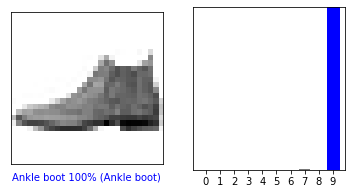

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


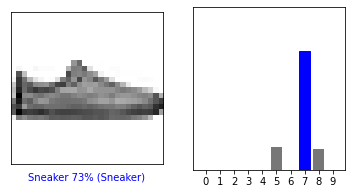

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

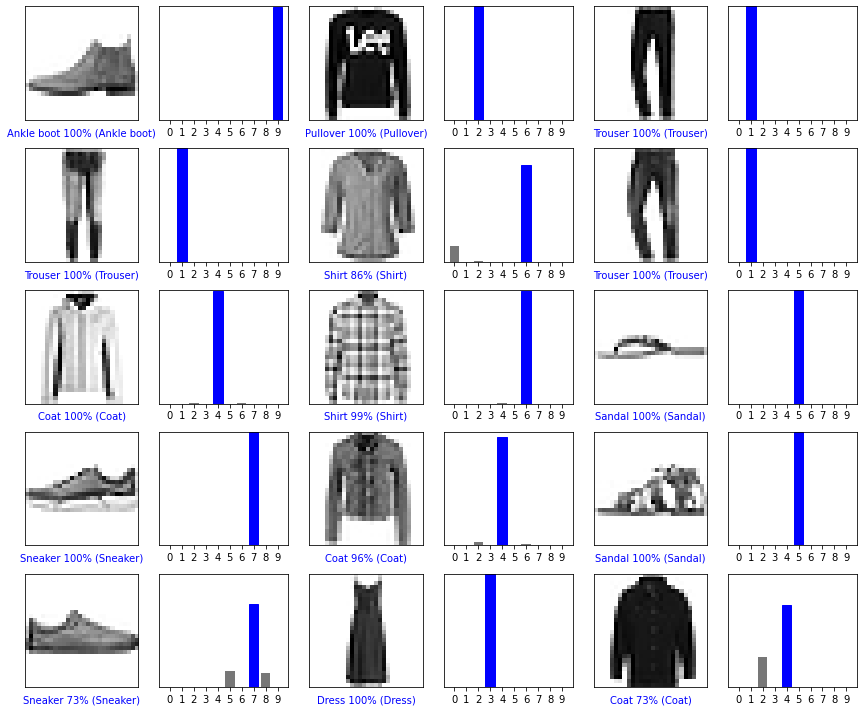

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Use the trained model

In [26]:
# grab an image from the test dataset
img = test_images[1]
img.shape

(28, 28)

 tf.keras models are optimized to make predictions on a batch, or collection. Accordingly, even though you're using a single image, you need to add it to a list

In [27]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [28]:
# predict the correct label from this image
predictions_single= probability_model.predict(img)
predictions_single

1/1 [==============================] - 0s 16ms/step


array([[3.7660188e-06, 4.3693486e-14, 9.9968946e-01, 7.6101446e-15,
        2.9691795e-04, 9.9875316e-13, 9.9433955e-06, 2.2657172e-17,
        2.2854987e-11, 3.2649966e-18]], dtype=float32)

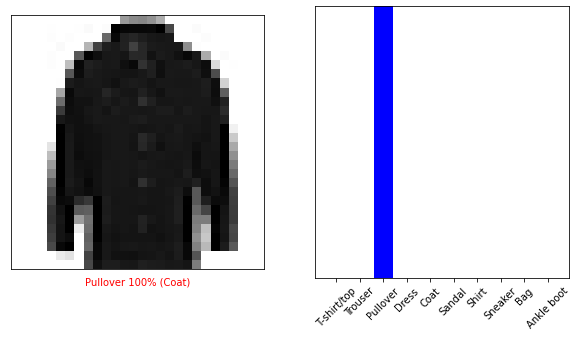

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions_single[0], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2

## 2. Hyperparameter tuning or hypertuning
https://www.tensorflow.org/tutorials/keras/keras_tuner

Hyperparameters are of two types:

**Model hyperparameters** which influence model selection such as the number and width of hidden layers

**Algorithm hyperparameters** which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier


In [31]:
# import and install the keras tuner
import sys
!{sys.executable} -m pip install keras-tuner

In [32]:
import keras_tuner as kt

In [33]:
# load the data
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [34]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [35]:
# define the model
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28 ,28)))
  #Tune the number of unit in the first Dense layer, 
  #choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step =32)
  model.add(keras.layers.Dense(units=hp_units, activation ='relu'))
  model.add(keras.layers.Dense(10))

  #Tune the learning rate for the optimizer
  #choose an optimal value from 0.01, 0.001, 0r 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model


The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn. In this tutorial, you use the Hyperband tuner.

We will use Hyperband. To instantiate the Hyperband tuner, you must specify the hypermodel, the objective to optimize and the maximum number of epochs to train (max_epochs)

In [36]:
# instantiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder, 
                     objective ='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory ='my_dir',
                     project_name='intro_to_kt')

In [37]:
#Create a callback to stop training early after reaching a certain value for the validation loss
stop_early =tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience =5)

In [38]:
#run the hyperparameter search, the arguments for the search method are the same as those used for tf.keras.model.fit in addition to the callback above.
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 26s]
val_accuracy: 0.8835833072662354

Best val_accuracy So Far: 0.8924999833106995
Total elapsed time: 00h 04m 20s
INFO:tensorflow:Oracle triggered exit


In [39]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps.get('units')

448

In [40]:
best_hps.get('learning_rate')

0.001

In [41]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8265 - val_loss: 0.4043 - val_accuracy: 0.8560
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3681 - accuracy: 0.8649 - val_loss: 0.3818 - val_accuracy: 0.8597
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3335 - accuracy: 0.8767 - val_loss: 0.3509 - val_accuracy: 0.8733
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3048 - accuracy: 0.8874 - val_loss: 0.3271 - val_accuracy: 0.8782
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2855 - accuracy: 0.8941 - val_loss: 0.3269 - val_accuracy: 0.8845
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2747 - accuracy: 0.8990 - val_loss: 0.3384 - val_accuracy: 0.8767
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2580 - accuracy: 0.9038 - val_loss: 0.3303 - val_accuracy:

In [42]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/43
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4971 - accuracy: 0.8216 - val_loss: 0.4060 - val_accuracy: 0.8548
Epoch 2/43
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3706 - accuracy: 0.8634 - val_loss: 0.3481 - val_accuracy: 0.8754
Epoch 3/43
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3299 - accuracy: 0.8783 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 4/43
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3073 - accuracy: 0.8856 - val_loss: 0.3451 - val_accuracy: 0.8736
Epoch 5/43
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2856 - accuracy: 0.8947 - val_loss: 0.3364 - val_accuracy: 0.8771
Epoch 6/43
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2702 - accuracy: 0.8981 - val_loss: 0.3102 - val_accuracy: 0.8892
Epoch 7/43
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2566 - accuracy: 0.9031 - val_loss: 0.3226 - val_accuracy:

In [43]:
# evaluate the hypermodel on the test data
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 0s 840us/step - loss: 0.5828 - accuracy: 0.8826
[test loss, test accuracy]: [0.5827930569648743, 0.8826000094413757]
